# Recurrent Neural Network

### Importing the libraries

In [76]:
import tensorflow as tf
from keras.optimizers import Adam
import matplotlib.pyplot as plt

## Data Preprocessing

### Loading the dataset

In [53]:
# Load the IMDB dataset
max_features = 10000  # Number of unique words to consider

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)

### Preprocessing the training and testing set

In [54]:
max_len = 500  # Maximum number of words per review

# Pad sequences to ensure consistent input size
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

## Building the RNN

### Initialising the RNN

In [55]:
model = tf.keras.models.Sequential()

### Embedding layer

In [56]:
# Embedding layer to represent words as vectors
model.add(tf.keras.layers.Embedding(input_dim=max_features, output_dim=128, input_length=max_len))

### Hidden layer

In [57]:
# Recurrent layer (RNN)
model.add(tf.keras.layers.SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))

### Output layer

In [58]:
# Output layer (binary classification)
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

## Training the RNN

### Compiling the RNN

In [80]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

### Training the RNN on the Training set and evaluating it on the Test set

In [82]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 312s 398ms/step - loss: 0.3139 - accuracy: 0.8745 - val_loss: 0.5394 - val_accuracy: 0.7862
Epoch 2/10
782/782 [==============================] - 323s 413ms/step - loss: 0.2920 - accuracy: 0.8832 - val_loss: 0.5414 - val_accuracy: 0.7952
Epoch 3/10
782/782 [==============================] - 292s 374ms/step - loss: 0.2684 - accuracy: 0.8964 - val_loss: 0.5514 - val_accuracy: 0.7974
Epoch 4/10
782/782 [==============================] - 246s 314ms/step - loss: 0.2521 - accuracy: 0.9036 - val_loss: 0.5468 - val_accuracy: 0.7677
Epoch 5/10
782/782 [==============================] - 229s 293ms/step - loss: 0.2692 - accuracy: 0.8916 - val_loss: 0.5584 - val_accuracy: 0.7809
Epoch 6/10
782/782 [==============================] - 227s 291ms/step - loss: 0.2527 - accuracy: 0.9022 - val_loss: 0.5817 - val_accuracy: 0.7881
Epoch 7/10
782/782 [==============================] - 236s 301ms/step - loss: 0.2523 - accuracy: 0.9024 - val_loss: 0.6040 -

## Visualize the model performance

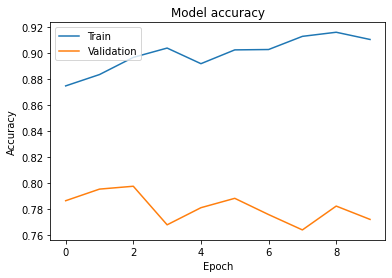

In [84]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



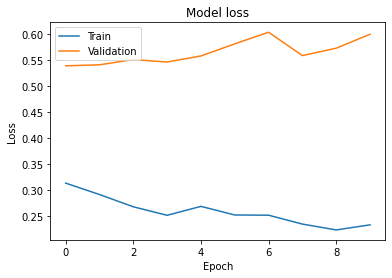

In [85]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Making a single prediction

In [92]:
# Test sentence
test_text = "fantastic movie , one of the best of the year!"

# Load word index and adjust with `index_from=3`
word_to_id = tf.keras.datasets.imdb.get_word_index()
word_to_id = {word: (index + 3) for word, index in word_to_id.items()}  # Shift index by 3

# Add reserved tokens
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<OOV>"] = 2

# Tokenize input sentence
words = test_text.lower().split()
sequence = [word_to_id.get(word, 2) for word in words]  # Default to OOV token if not found
batch_sequence = [sequence]  # Add batch dimension

# Pad the sequence
padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(batch_sequence, maxlen=max_len)

# Predict sentiment
prediction = model.predict(padded_sequence)

# Interpret result
if prediction[0] > 0.5:
    print("Positive sentiment")
else:
    print("Negative sentiment")

print("Original words:", words)
print("Tokenized sequence:", sequence)
print("Padded sequence shape:", padded_sequence.shape)

1/1 [==============================] - 0s 242ms/step
Negative sentiment
Original words: ['fantastic', 'movie', ',', 'one', 'of', 'the', 'best', 'of', 'the', 'year!']
Tokenized sequence: [777, 20, 2, 31, 7, 4, 118, 7, 4, 2]
Padded sequence shape: (1, 500)


In [93]:
# Test sentence
test_text = "worst movie , didn't like it at all!"

# Load word index and adjust with `index_from=3`
word_to_id = tf.keras.datasets.imdb.get_word_index()
word_to_id = {word: (index + 3) for word, index in word_to_id.items()}  # Shift index by 3

# Add reserved tokens
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<OOV>"] = 2

# Tokenize input sentence
words = test_text.lower().split()
sequence = [word_to_id.get(word, 2) for word in words]  # Default to OOV token if not found
batch_sequence = [sequence]  # Add batch dimension

# Pad the sequence
padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(batch_sequence, maxlen=max_len)

# Predict sentiment
prediction = model.predict(padded_sequence)

# Interpret result
if prediction[0] > 0.5:
    print("Positive sentiment")
else:
    print("Negative sentiment")

print("Original words:", words)
print("Tokenized sequence:", sequence)
print("Padded sequence shape:", padded_sequence.shape)

1/1 [==============================] - 0s 77ms/step
Negative sentiment
Original words: ['worst', 'movie', ',', "didn't", 'like', 'it', 'at', 'all!']
Tokenized sequence: [249, 20, 2, 161, 40, 12, 33, 2]
Padded sequence shape: (1, 500)
